# Bibliotecas

In [ ]:
import os
import numpy as np
import pandas as pd
from keras.backend import var
import pickle as pk
from keras.datasets import cifar10
from keras.datasets import mnist
from skimage.util import random_noise
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import keras.backend as K
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Reshape, UpSampling2D, Conv2DTranspose
from keras.models import Model, load_model
from keras.utils import to_categorical
from keras.optimizers import SGD

from keras.datasets import cifar10
from keras.datasets import cifar100

import math
from statistics import mean

import pandas as pd
from google.colab import drive
from skimage.metrics import structural_similarity as ssim

drive.mount('/content/gdrive')

_NOISE_FOLDER = '/content/gdrive/MyDrive/IC/Datasets/'
_DATASET = 'cifar10'
_NOISE_LEVEL = .3

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def rmse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return math.sqrt(err)

def PSNR(original, compressed):
  max_pixel = 255.0
  return 20 * math.log10(max_pixel / rmse(compressed, original))

def mean_measures(res, Ytest):
  var_rmse = []
  var_psnr = []
  var_ssim = []

  for i in range(0, Ytest.shape[0]):
    imgOriginal = np.reshape(Ytest[i], Ytest[i].shape[0] * Ytest[i].shape[1] * Ytest[i].shape[2])
    imgAniso = np.reshape(res[i], res[i].shape[0] * res[i].shape[1] * res[i].shape[2])

    var_psnr.append(PSNR(res[i], Ytest[i]))
    var_rmse.append(rmse(Ytest[i], res[i]))
    var_ssim.append(ssim(imgOriginal, imgAniso, data_range=imgAniso.max() - imgAniso.min()))

  return mean(var_rmse), mean(var_psnr), mean(var_ssim)

x = []

Xtest = np.load(_NOISE_FOLDER + '%s_Xtest_%s.npy' % (_DATASET ,_NOISE_LEVEL))
Ytest = np.load(_NOISE_FOLDER + '%s_Ytest_%s.npy' % (_DATASET ,_NOISE_LEVEL))

Xtest = Xtest / 255
Ytest = Ytest / 255

for metric in ['constant', 'linear', 'log', 'ladder', 'ladderlog']:

  model = load_model('/content/cifar10_%s_model.h5' % (metric))

  res = model.predict(Xtest)

  s = mean_measures(res, Ytest)

  x.append(s)

print('Done!')

938/938 [==============================] - 10s 11ms/step
Done!


In [ ]:
data = {
    'Metrics': ['RMSE', 'PNSR', 'SSIM'],
    'constant': x[0],
    'linear': x[1],
    'log': x[2],
    'ladder': x[3],
    'ladderlog': x[4]
}

df = pd.DataFrame(data)
print(df)

  Metrics   constant     linear        log     ladder  ladderlog
0    RMSE   0.260432   0.259667   0.258489   0.259806   0.262341
1    PNSR  59.938536  59.968653  60.006560  59.963762  59.881398
2    SSIM   0.354729   0.344277   0.353042   0.359138   0.338869


# Predict do modelo

In [ ]:
_NOISE = 0.2

# Carregando o dataset
(_, _), (Xtest, _) = cifar10.load_data()


# Normalizando o outpu
Ytest = Xtest / 255

# Aplicando o ruído na imagem original
Xtest = random_noise(Xtest, mode='gaussian', seed=None, clip=True, var=_NOISE)

img0 = [0]

# Normalização o input
Xtest = Xtest / 255

# Checando a saída
print(Ytest[0][0][0])
print(Xtest[0][0][0])

170498071/170498071 [==============================] - 3s 0us/step
[0.23137255 0.24313725 0.24705882]
[0.00103997 0.00180558 0.00042077]


In [ ]:
# Carreando o modelo
model = load_model('/content/cifar10_model.h5')

# Fazendo as predições
res = model.predict(Xtest)

# Checando saída
print(res[0][0][0])

1563/1563 [==============================] - 11s 7ms/step
[0.34100318 0.28040016 0.1665861 ]


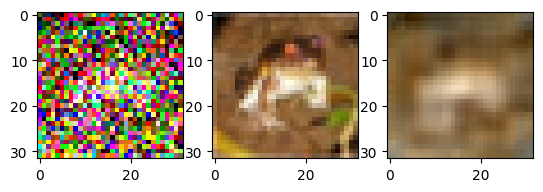

In [ ]:
from PIL import Image

img1 = Ytest[0] * 255
img1 = np.asarray(img1, dtype = 'int')

img2 = res[0] * 255
img2 = np.asarray(img2, dtype = 'int')

ax = plt.subplot(1, 3, 1)
plt.imshow(img0)
ax = plt.subplot(1, 3, 2)
plt.imshow(img1)
ax = plt.subplot(1, 3, 3)
plt.imshow(img2)
plt.show()